In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [39]:
y_var = pd.read_csv("drive/My Drive/Capstone Shared Docs/result/y_vars.csv")
score_tfidf = pd.read_csv("/content/drive/MyDrive/Capstone Shared Docs/strategy score/tf_idf_2011.csv")
score_word2vec = pd.read_csv("/content/drive/MyDrive/Capstone Shared Docs/strategy score/word2_vec_2011.csv")

In [40]:
y_var.head()

,portfoliocompanyid,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,exit_value,exit_value_partiallyexited
0,26178,8,351.22,0.0,80.0,1.0,74.52,1674.52,74.52
1,26580,16,812.00,0.0,292.0,1.0,292.10,491.95,491.95
2,26635,8,710.00,0.0,710.0,1.0,151.30,151.30,151.30
3,26957,1,18.00,0.0,0.0,0.0,0.00,0.00,0.00
4,28167,1,0.00,0.0,0.0,0.0,0.00,0.00,0.00


In [41]:
score = score_tfidf.copy()
score = score.rename(columns = {'Strat_score':'tfidf_score'}) 
score['word2vec_score'] = score_word2vec['Strat_score']

In [42]:
score.head(3)

,text,comp_type,text_cleaned,text_cleaned_with_sw,compid,language,Rela_language,text_len,words_len,website,name,info,Dict_similarity,tfidf_score,word2vec_score
0,Skip to main content area One Click: Safety - ...,S,skip main content area one click safety con...,skip to main content area one click safety ...,98564,en,True,8784,1186,www.stearclear.com,STEARCLEAR,"Founded in 2011 and is based in Paramus, New J...","{3051: 0.23346260078568049, 126701: 0.16235377...",0.840762,0.030242
1,Home For Providers For Patients See WellFX Dem...,S,home providers patients see wellfx demo news p...,home for providers for patients see wellfx dem...,93680,en,True,8059,1037,www.well-fx.com,WellFX LLC,"Founded in 2011 and based in California US, We...","{639: 0.0716486793250373, 1638: 0.065549748351...",0.935614,0.033190
2,How It Works For A Good Cause Log In Join Now ...,S,works good cause log join barkbox com make bes...,how it works for a good cause log in join now ...,106048,en,True,26178,3425,www.barkbox.com,"BarkBox, Inc.","Founded in 2011 and based in New York, US, Bar...","{1307: 0.24877625116625046, 110537: 0.23897494...",0.771925,0.009504


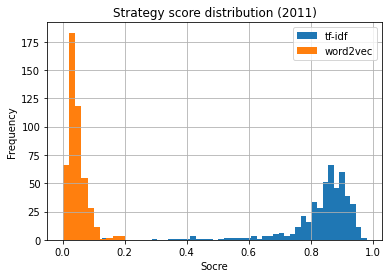

In [43]:
score.tfidf_score.hist(bins=50, label = 'tf-idf')
score.word2vec_score.hist(label = 'word2vec')
plt.legend()
plt.title('Strategy score distribution (2011)')
plt.xlabel('Socre')
plt.ylabel('Frequency');

## Build Linear regression model

In [44]:
# set index
y_var = y_var.set_index('portfoliocompanyid')
score = score.set_index('compid')

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,exit_value,exit_value_partiallyexited,text,comp_type,text_cleaned,text_cleaned_with_sw,compid,language,Rela_language,text_len,words_len,website,name,info,Dict_similarity,Strat_score


In [50]:
print(y_var.shape)
print(score.shape)

(13704, 8)
(470, 14)


In [55]:
df = pd.concat([y_var,score],axis=1,join='inner')

In [56]:
df.head()

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,exit_value,exit_value_partiallyexited,text,comp_type,text_cleaned,text_cleaned_with_sw,language,Rela_language,text_len,words_len,website,name,info,Dict_similarity,tfidf_score,word2vec_score
72006,14,111.40,0.00,83.20,0.0,0.0,0.0,0.0,Email a Sales Engineer a Question Please corre...,S,email sales engineer question please correct f...,email a sales engineer a question please corre...,en,True,497668,128953,www.appneta.com,"AppNeta, Inc.","Founded in 2011 and based in Massachusetts, Ap...","{1640: 0.7137819907606033, 7431: 0.70959319808...",0.457320,0.005415
72459,10,240.00,0.00,206.00,0.0,0.0,0.0,0.0,Sign Into Yahoo! New User? Sign Up Voice Home ...,S,sign yahoo new user sign voice home help n...,sign into yahoo new user sign up voice home ...,en,True,9644,1268,www.dialpad.com,"Dialpad, Inc.","Founded in 2011 and based in California, US, D...","{5598: 0.8341507689962296, 77176: 0.6544544604...",0.388242,0.076961
72495,3,11.50,0.85,5.25,0.0,0.0,0.0,0.0,PunchTab Developers How PunchTab works Log in ...,S,punchtab developers punchtab works log invalid...,punchtab developers how punchtab works log in ...,en,True,24006,3225,www.punchtab.com,"PunchTab, Inc.","Founded in 2011, PunchTab is a loyalty platfor...","{95019: 0.11501415250206415, 1690: 0.083924614...",0.912619,0.026383
72620,2,3.60,0.60,3.60,0.0,0.0,0.0,0.0,BestVendor Play Video What is BestVendor? Sign...,S,bestvendor play video bestvendor sign bestven...,bestvendor play video what is bestvendor sign...,en,True,46939,5897,www.bestvendor.com,BestVendor,"Founded in 2011 and is based in Washington, Di...","{137208: 0.2555456063124094, 110537: 0.2519659...",0.763173,0.009705
72976,2,3.41,0.00,2.50,0.0,0.0,0.0,0.0,mission apps team jobs contact press Tweet Str...,S,mission apps team jobs contact press tweet str...,mission apps team jobs contact press tweet str...,en,True,438,61,www.azumio.com,Azumio,"Founded in 2011 and based in Palo Alto, Califo...","{6643: 0.192270023203575, 4551: 0.176114989381...",0.857275,0.094309


In [92]:
def LinearReg(df,score,dep_var):
  X = np.asarray(df[score]).reshape((-1,1))
  y = np.asarray(df[dep_var])
  reg = LinearRegression().fit(X,y)
  y_hat = reg.predict(X)

  print('R2 score:',reg.score(X,y))
  print('Coefficents (slope)',reg.coef_)

  plt.scatter(X,y)
  plt.title('Linear regression - tfidf')
  plt.xlabel('Strategy score')
  plt.ylabel(dep_var)
  plt.plot(X,y_hat,color = 'red');

R2 score: 0.0009583955764522757
Coefficents (slope) [0.81307481]


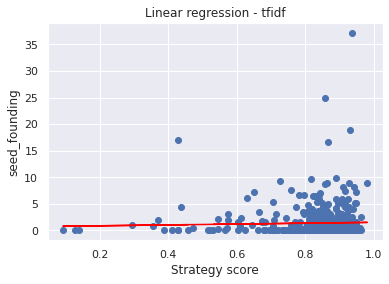

In [93]:
LinearReg(df,'tfidf_score','seed_founding')

R2 score: 0.007544471233922546
Coefficents (slope) [9.25528763]


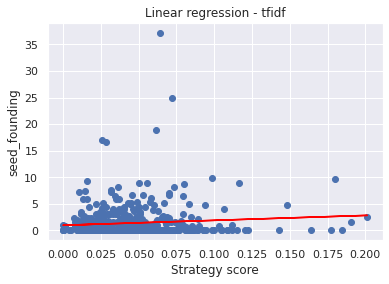

In [94]:
LinearReg(df,'word2vec_score','seed_founding')

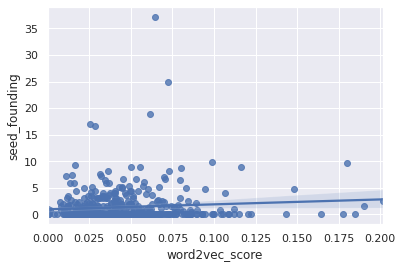

In [95]:
import seaborn as sns; sns.set_theme(color_codes=True)
ax = sns.regplot(x="word2vec_score", y="seed_founding", data=df)

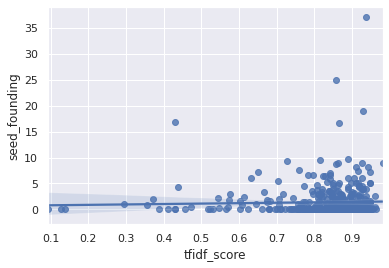

In [96]:
ax = sns.regplot(x="tfidf_score", y="seed_founding", data=df)

R2 score: 0.0008141092542085504
Coefficents (slope) [-23.8733754]


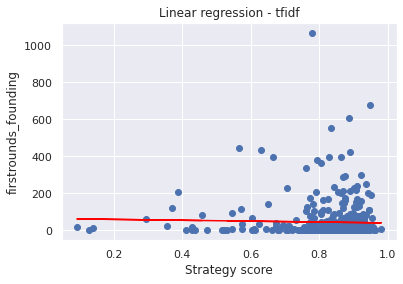

In [97]:
LinearReg(df,'tfidf_score','firstrounds_founding')

R2 score: 0.00010598151132257261
Coefficents (slope) [-34.94660137]


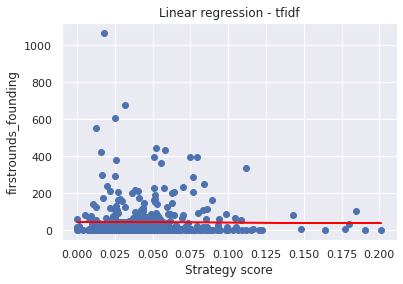

In [98]:
LinearReg(df,'word2vec_score','firstrounds_founding')

R2 score: 0.0006947857943983005
Coefficents (slope) [37.36138993]


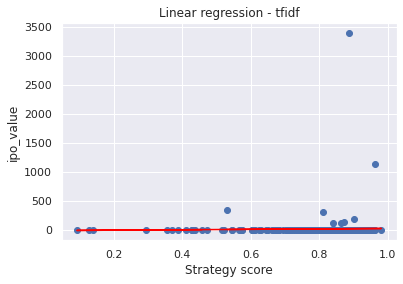

In [99]:
LinearReg(df,'tfidf_score','ipo_value')

R2 score: 0.0029629712952984337
Coefficents (slope) [313.02476051]


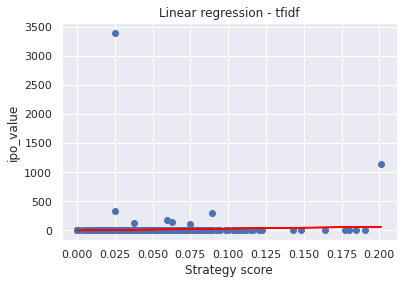

In [100]:
LinearReg(df,'word2vec_score','ipo_value')